<a href="https://www.kaggle.com/code/emdogan/statistical-vis-pii-data-classification-eda?scriptVersionId=163073652" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 align="center"  style="background-color:yellow;" style="font-family:verdana;"> ⬆️⬆️⬆️ If you find this note book helpful. <b>Please upvote!</b> ⬆️⬆️⬆️ </h1>

<h1 align="center" style="background-color:powderblue;" style="font-size:300%;">PII detection removal from educational data   </h1>




<img src="https://media.istockphoto.com/id/1289306159/photo/close-up-personally-identifiable-information-word.jpg?s=2048x2048&w=is&k=20&c=pc7dka2Afxca4V6j6y7RVIRhvd1O7Stbo8e4JZCo4zc=" align="center"> </img>

### PII Types
Seven Labels to classify from the following types of PII:

- `NAME_STUDENT` - The full or partial name of a student that is not necessarily the author of the essay. This excludes instructors, authors, and other person names.
-`EMAIL` - A student’s email address.
-`USERNAME` - A student's username on any platform.
-`ID_NUM` - A number or sequence of characters that could be used to identify a student, such as a student ID or a social security number.
-`PHONE_NUM` - A phone number associated with a student.
-`URL_PERSONAL` - A URL that might be used to identify a student.
-`STREET_ADDRESS` - A full or partial street address that is associated with the student, such as their home address.

### Token labels are presented in BIO (Beginning, Inner, Outer) format. The PII type is prefixed with “B-” when it is the beginning of an entity. If the token is a continuation of an entity, it is prefixed with “I-”. Tokens that are not PII are labeled “O”.

In [1]:
import numpy as np 
import pandas as pd 
from colorama import Fore, Back, Style
import os
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True
%matplotlib inline

In [2]:
train_df = pd.read_json( '/kaggle/input/pii-detection-removal-from-educational-data/train.json')
test_df = pd.read_json( '/kaggle/input/pii-detection-removal-from-educational-data/test.json')
sub_df = pd.read_csv( '/kaggle/input/pii-detection-removal-from-educational-data/sample_submission.csv')

In [3]:
train_df['token_len'] = train_df['tokens'].apply(len)
test_df['token_len'] = test_df['tokens'].apply(len)
train_df['label_freq'] = train_df['labels'].apply(Counter)
train_df['label_count'] = train_df['label_freq'].apply( lambda x: len(dict(x)))

In [4]:
train_df.head()

,document,full_text,tokens,trailing_whitespace,labels,token_len,label_freq,label_count
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...",753,"{'O': 747, 'B-NAME_STUDENT': 3, 'I-NAME_STUDEN...",3
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...",563,"{'B-NAME_STUDENT': 2, 'I-NAME_STUDENT': 2, 'O'...",3
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...",729,"{'O': 727, 'B-NAME_STUDENT': 1, 'I-NAME_STUDEN...",3
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...",1071,"{'O': 1069, 'B-NAME_STUDENT': 1, 'I-NAME_STUDE...",3
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...",1927,"{'O': 1925, 'B-NAME_STUDENT': 1, 'I-NAME_STUDE...",3


In [5]:
test_df.head()

,document,full_text,tokens,trailing_whitespace,token_len
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...",753
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...",563
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...",729
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...",1071
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...",1927


# visualization of token lengths

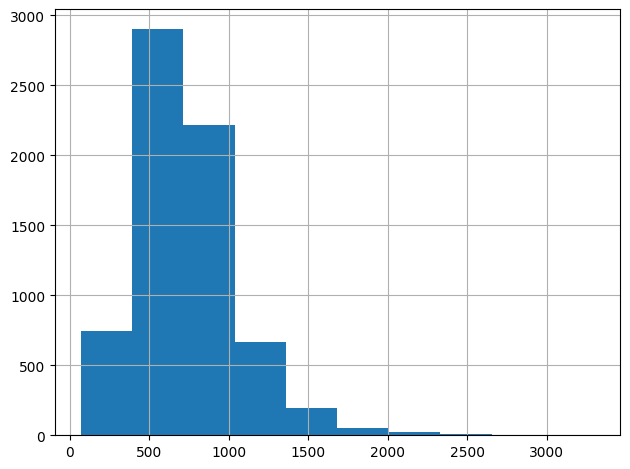

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

train_df['token_len'].hist()
plt.show()

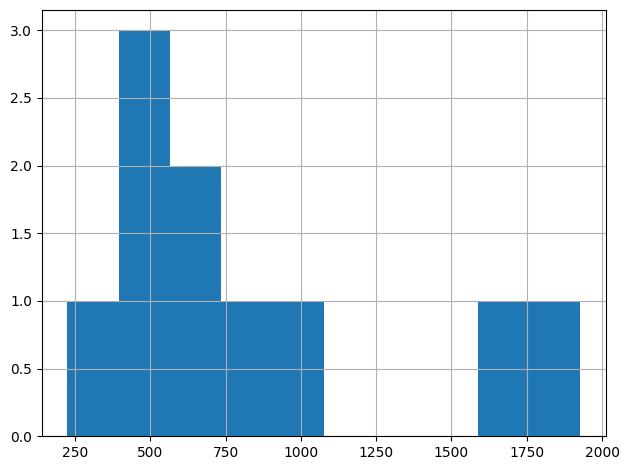

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

test_df['token_len'].hist()
plt.show()

# All detailed information

<div style="background-color:purple; color:white; padding:10px; border-radius: 5px;">
Train set

In [8]:
pd.set_option('display.max_columns', None)
def check_df(dataframe, head = 5):
    print("############################ Shape ############################")
    print(dataframe.shape)
    print("############################ Types ############################")
    print(dataframe.dtypes)
    print("############################ Head ############################")
    print(dataframe.head(head))
    print("############################ tail ############################")
    print(dataframe.tail(head))
    print("############################ Na ############################")
    print(dataframe.isnull().sum())
    print("############################ Quantiles ############################")
    print(dataframe.describe().T)
check_df(train_df)

############################ Shape ############################
(6807, 8)
############################ Types ############################
document                int64
full_text              object
tokens                 object
trailing_whitespace    object
labels                 object
token_len               int64
label_freq             object
label_count             int64
dtype: object
############################ Head ############################
   document                                          full_text  \
0         7  Design Thinking for innovation reflexion-Avril...   
1        10  Diego Estrada\n\nDesign Thinking Assignment\n\...   
2        16  Reporting process\n\nby Gilberto Gamboa\n\nCha...   
3        20  Design Thinking for Innovation\n\nSindy Samaca...   
4        56  Assignment:  Visualization Reflection  Submitt...   

                                              tokens  \
0  [Design, Thinking, for, innovation, reflexion,...   
1  [Diego, Estrada, \n\n, Design, Th

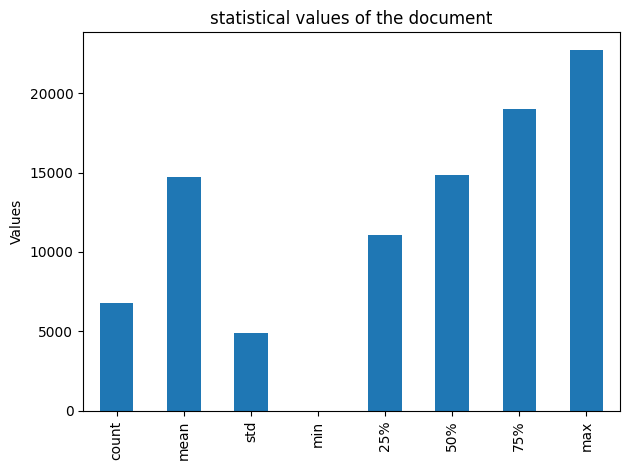

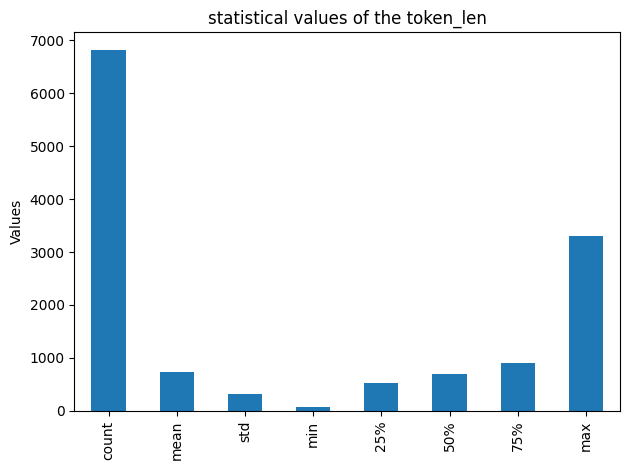

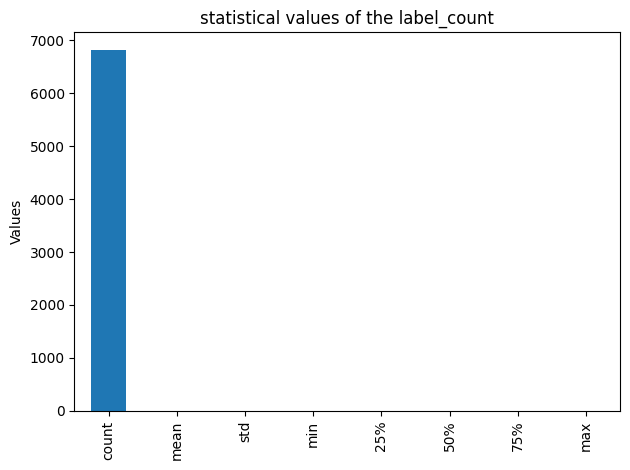

In [9]:
tr_df = train_df["document"].describe().T

tr_df.plot(kind='bar')
plt.ylabel('Values')
plt.title('statistical values of the document')
plt.show()

tr_df = train_df["token_len"].describe().T

tr_df.plot(kind='bar')
plt.ylabel('Values')
plt.title('statistical values of the token_len')
plt.show()

tr_df = train_df["label_count"].describe().T

tr_df.plot(kind='bar')
plt.ylabel('Values')
plt.title('statistical values of the label_count')
plt.show()

<div style="background-color:purple; color:white; padding:10px; border-radius: 5px;">
test set

In [10]:
pd.set_option('display.max_columns', None)
def check_df(dataframe, head = 5):
    print("############################ Shape ############################")
    print(dataframe.shape)
    print("############################ Types ############################")
    print(dataframe.dtypes)
    print("############################ Head ############################")
    print(dataframe.head(head))
    print("############################ tail ############################")
    print(dataframe.tail(head))
    print("############################ Na ############################")
    print(dataframe.isnull().sum())
    print("############################ Quantiles ############################")
    print(dataframe.describe().T)
check_df(test_df)

############################ Shape ############################
(10, 5)
############################ Types ############################
document                int64
full_text              object
tokens                 object
trailing_whitespace    object
token_len               int64
dtype: object
############################ Head ############################
   document                                          full_text  \
0         7  Design Thinking for innovation reflexion-Avril...   
1        10  Diego Estrada\n\nDesign Thinking Assignment\n\...   
2        16  Reporting process\n\nby Gilberto Gamboa\n\nCha...   
3        20  Design Thinking for Innovation\n\nSindy Samaca...   
4        56  Assignment:  Visualization Reflection  Submitt...   

                                              tokens  \
0  [Design, Thinking, for, innovation, reflexion,...   
1  [Diego, Estrada, \n\n, Design, Thinking, Assig...   
2  [Reporting, process, \n\n, by, Gilberto, Gambo...   
3  [Design, Thin

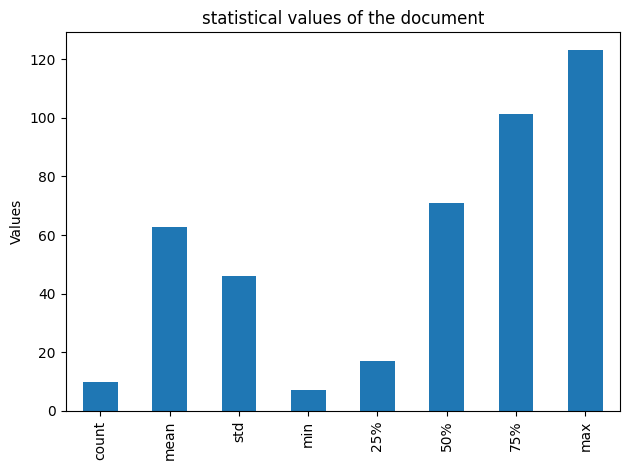

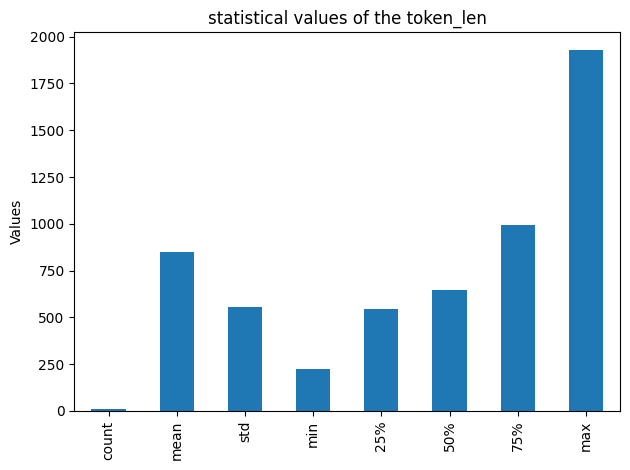

In [11]:
tr_df = test_df["document"].describe().T

tr_df.plot(kind='bar')
plt.ylabel('Values')
plt.title('statistical values of the document')
plt.show()

tr_df = test_df["token_len"].describe().T

tr_df.plot(kind='bar')
plt.ylabel('Values')
plt.title('statistical values of the token_len')
plt.show()

<h2 align="center" style="background-color:yellow;"  style="font-size:200%;"> Look few through examples </h2>

In [12]:
train_df.values[1103]
for (col, val) in zip(train_df.columns, train_df.values[1103]):
    print(f"{Fore.RED} {col} => {Fore.GREEN} {val}")

 document =>  9854
 full_text =>  Waseem Mabunda  591 Smith Centers Apt. 656
Joshuamouth, RI 95963 ( The Netherlands)  410.526.1667  vpi@mn.nl

Mind Mapping,      Challenge:     For several years I have been working for an Asset manager in the Netherlands. During this period I have been involved in many  projects. Certainly in the world of asset management, much has changed in recent years in the area of Law and Regulations.  What I mainly experience in these projects is that all departments have a different interest in starting a new project. This  certainly does not benefit the project. How do you get everyone to complete a project in the common interest and how do you  motivate everyone who participate in the project?    Selection:    An improvement project can be approached in different ways. The most common way is the scrum approach. We work in  multidisciplinary teams that work in short sprints, with a fixed length of 1 to 4 weeks. Cooperation is very important and  everyone must

In [13]:
def print_example( idx):
    tokens = train_df.values[idx][2]
    labels = train_df.values[idx][4]
    for idx,(tk,l) in enumerate(zip( tokens, labels)):
        if l != 'O':
            print(f"{Fore.BLUE} index:{idx} - {Fore.RED} token:{tk} - {Fore.GREEN} label:{l}")

In [14]:
for i in [0,24,26,219, 1103]:
    print_example(i)
    print('==='*20)

 index:9 -  token:Nathalie -  label:B-NAME_STUDENT
 index:10 -  token:Sylla -  label:I-NAME_STUDENT
 index:482 -  token:Nathalie -  label:B-NAME_STUDENT
 index:483 -  token:Sylla -  label:I-NAME_STUDENT
 index:741 -  token:Nathalie -  label:B-NAME_STUDENT
 index:742 -  token:Sylla -  label:I-NAME_STUDENT
 index:15 -  token:Dharmendra -  label:B-NAME_STUDENT
 index:16 -  token:Asiri -  label:I-NAME_STUDENT
 index:28 -  token:djones@gmail.com -  label:B-EMAIL
 index:31 -  token:https://www.linkedin.com/in/mmartinez -  label:B-URL_PERSONAL
 index:760 -  token:Dharmendra -  label:B-NAME_STUDENT
 index:761 -  token:Asiri -  label:I-NAME_STUDENT
 index:4 -  token:Suhag -  label:B-NAME_STUDENT
 index:5 -  token:Shah -  label:I-NAME_STUDENT
 index:922 -  token:https://youtu.be/rFD2lJuvace -  label:B-URL_PERSONAL
 index:430 -  token:Eslam -  label:B-NAME_STUDENT
 index:431 -  token:Abo -  label:I-NAME_STUDENT
 index:432 -  token:Fatma -  label:I-NAME_STUDENT
 index:439 -  token:murraythomas@gma

<h2 align="center" style="background-color:yellow;"  style="font-size:200%;"> Get all levels  </h2>

In [15]:
label_set = set()
for val in train_df.label_freq.values:
    data_dict = dict(val)
    for key in data_dict.keys():
        label_set.add( key )
label2idx = {key:i for i,key in enumerate(label_set)}
idx2label = {i:key for i,key in enumerate(label_set)}

<h2 align="center" style="background-color:yellow;"  style="font-size:200%;"> Label Distribution </h2>

In [16]:
lables_list = []
for key in train_df.label_freq.values:
    val_dict = dict( key )
    for val in val_dict.keys():
        lables_list.append( val )
label_dict = dict(Counter(lables_list))
total = sum(label_dict.values())
label_dict = {key: round((value/total) * 100 , 2)  for key, value in label_dict.items()}

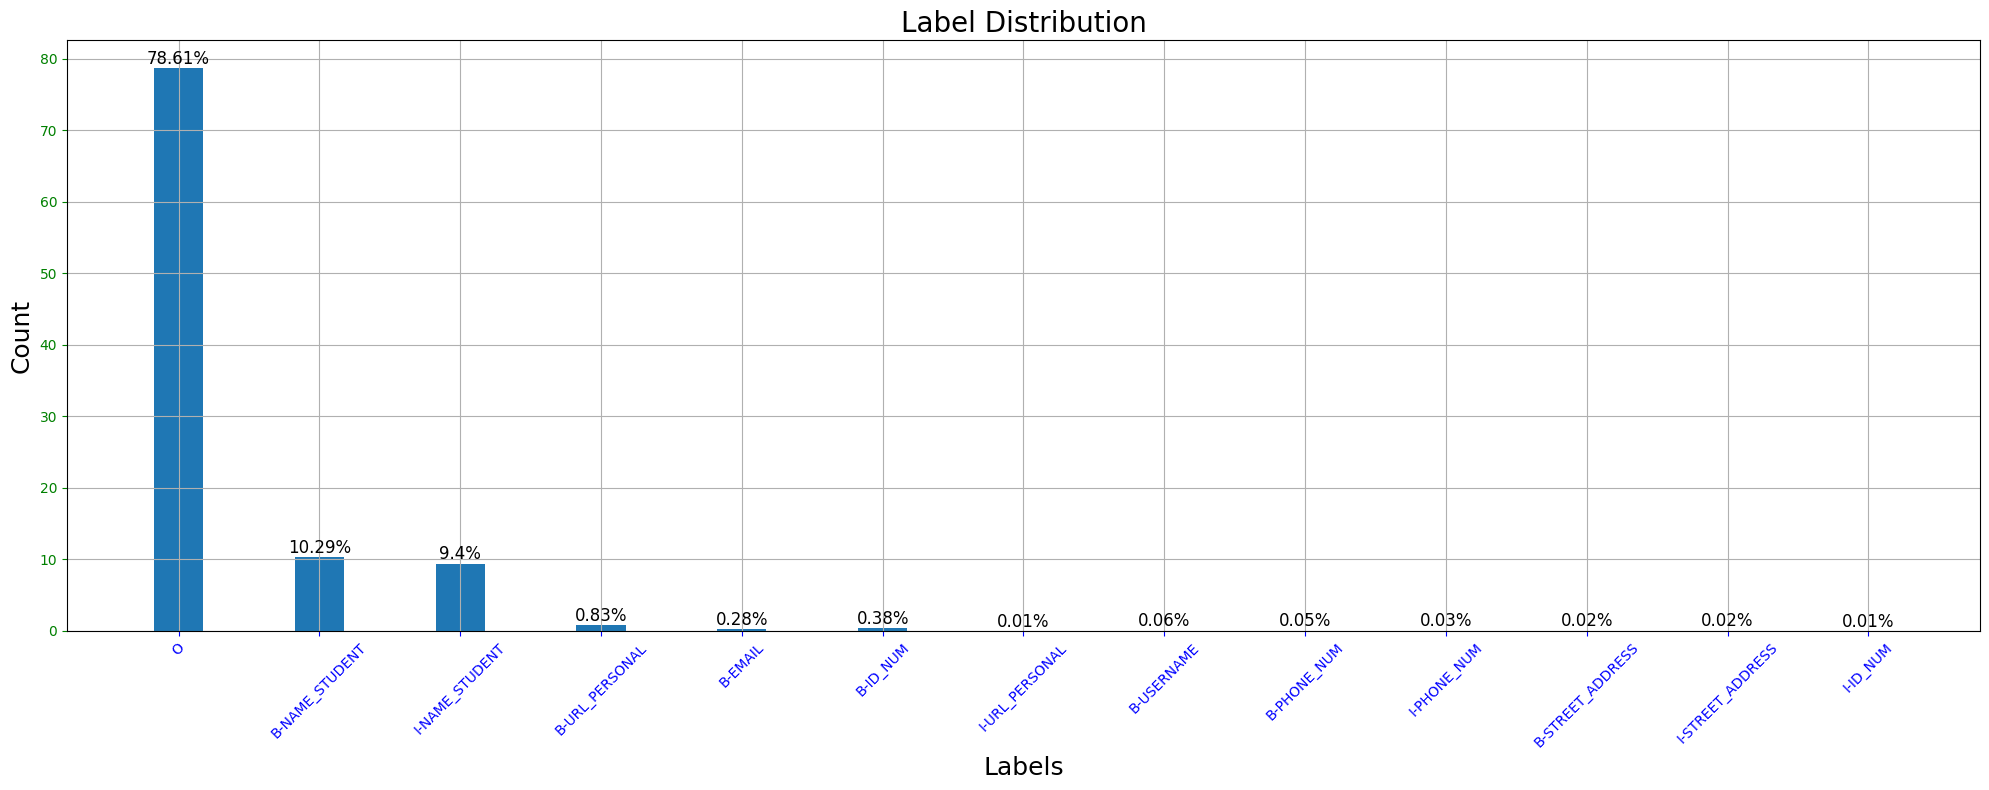

In [17]:
plt.rcParams["figure.figsize"] = (20,8)
width = 0.35
p1 = plt.bar( *zip(*label_dict.items()), width = 0.35,align='center')
for rect1 in p1:
    height = rect1.get_height()
    plt.annotate( "{}%".format(height),(rect1.get_x() + rect1.get_width()/2, height+.05),ha="center",va="bottom",fontsize=12)
plt.tick_params(axis='x', colors='blue')
plt.tick_params(axis='y', colors='green')
plt.xticks(rotation=45)
plt.xlabel('Labels', fontsize=18, )
plt.ylabel('Count',fontsize=18,)
plt.grid()
plt.title('Label Distribution', fontdict = {'fontsize' : 20})
plt.show()

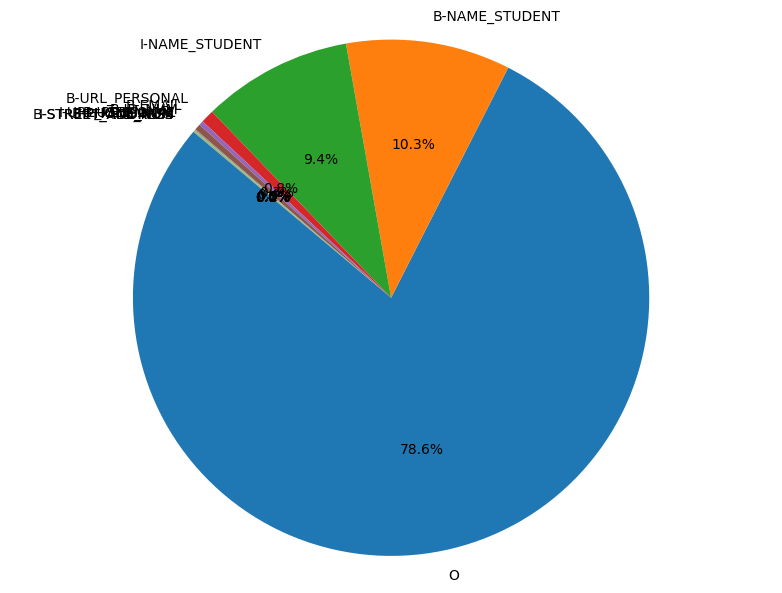

In [18]:
labels = label_dict.keys()
sizes = label_dict.values()

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()



<h2 align="center" style="background-color:yellow;"  style="font-size:200%;">This is a work in progress!! </h2>
